<a href="https://colab.research.google.com/github/ab-malek/AI-and-datascience/blob/main/Character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_test.csv')

df.head(2)




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0


In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(y_train)




[5 0 4 ... 5 6 8]


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt


print(y_train[0])

5


7


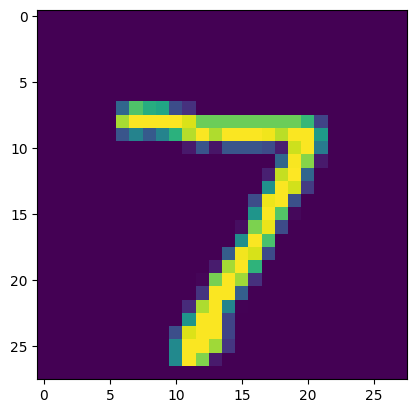

In [ ]:
plt.imshow(x_test[0])
print(y_test[0])

In [ ]:
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import Dense, Flatten


model = sq([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])


#  Error function
#  Optimizer
#  Activation fucntion
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=32)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8239 - loss: 8.5687 - val_accuracy: 0.8998 - val_loss: 0.4191
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9028 - loss: 0.4369 - val_accuracy: 0.9268 - val_loss: 0.3140
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9251 - loss: 0.3004 - val_accuracy: 0.9392 - val_loss: 0.2323
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9390 - loss: 0.2399 - val_accuracy: 0.9455 - val_loss: 0.2145
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9433 - loss: 0.2212 - val_accuracy: 0.9425 - val_loss: 0.2518


In [ ]:
result = model.predict(x_test[0].reshape(1,28,28))

print(result)

ans = np.argmax(result);
print(ans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.7559082e-34 4.1751834e-13 2.0612401e-24 2.6958242e-13 4.2692975e-17
  4.7107107e-23 8.5450675e-32 1.0000000e+00 1.1863913e-25 2.4750408e-09]]
7
